In [2]:
from google.colab import files

uploaded = files.upload()

Saving Nigeria_Weather_Crop_Data_Combined.csv to Nigeria_Weather_Crop_Data_Combined.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Nigeria_Weather_Crop_Data_Combined.csv')
df.head()

,Year,State,LGA,Season,Temperature (°C),Precipitation (mm),Weather Event,Crop 1,Crop 2,Crop 3,...,Planting to Harvest Duration Crop 3 (Months),Planting Season Crop 1,Planting Season Crop 2,Planting Season Crop 3,Effect on Crop 1,Effect on Crop 2,Effect on Crop 3,Yield Impact Crop 1 (%),Yield Impact Crop 2 (%),Yield Impact Crop 3 (%)
0,2020,Abia,Aba North,Wet,27.0,1704,Normal,Maize,Cassava,Yam,...,9,Wet,Wet,Wet,Optimal Growth,Optimal Growth,Optimal Growth,10,15,15
1,2020,Abia,Aba North,Dry,28.2,115,Normal,Maize,Cassava,Rice,...,4,Wet,Wet,Wet,Optimal Growth,Optimal Growth,Optimal Growth,10,15,15
2,2020,Abia,Aba South,Wet,27.4,1879,Flood,Maize,Yam,Rice,...,4,Wet,Wet,Wet,Reduced Yield,Crop Failure,Reduced Yield,-35,-50,-40
3,2020,Abia,Aba South,Dry,28.2,108,Normal,Yam,Rice,Cassava,...,10,Wet,Wet,Wet,Optimal Growth,Optimal Growth,Optimal Growth,15,15,15
4,2020,Abia,Arochukwu,Wet,27.3,1794,Normal,Cassava,Rice,Yam,...,9,Wet,Wet,Wet,Optimal Growth,Optimal Growth,Optimal Growth,15,15,15


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)
print(x_train.shape)

NameError: name 'x' is not defined

After running the cell above, a file picker will appear. Select the file you want to upload. Once uploaded, the `uploaded` variable will contain a dictionary where keys are the filenames and values are the file contents as bytes.

In [10]:
# Define your features (x) and target variable (y)
# Replace 'YourTargetColumn' with the actual name of the column you want to predict
x = df.drop(['Yield Impact Crop 1 (%)','Yield Impact Crop 2 (%)','Yield Impact Crop 3 (%)'], axis=1) # Example: dropping the target column to get features
y = df['Yield Impact Crop 1 (%)'] # Example: selecting the target column

# Now, split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)
print(x_train.shape)

(6184, 19)


In [11]:
print(x_train)

      Year        State            LGA Season  Temperature (°C)  \
6040  2023       Rivers  Port Harcourt    Wet              27.0   
5555  2023        Kebbi          Kalgo    Dry              31.1   
5003  2023  Cross River       Odukpani    Dry              28.9   
3925  2022      Katsina          Baure    Dry              29.7   
4705  2023      Adamawa       Shelleng    Dry              29.0   
...    ...          ...            ...    ...               ...   
905   2020        Kebbi   Birnin Kebbi    Dry              30.6   
5192  2023          FCT     Gwagwalada    Wet              27.7   
3980  2022      Katsina         Safana    Wet              28.1   
235   2020      Bayelsa        Yenagoa    Dry              28.7   
5157  2023        Enugu           Awgu    Dry              28.2   

      Precipitation (mm) Weather Event   Crop 1   Crop 2   Crop 3  \
6040                1882         Flood    Maize      Yam  Cassava   
5555                  55        Normal  Sorghum    Maize 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Identify categorical columns
categorical_features = x_train.select_dtypes(include=['object']).columns

# Create a column transformer to apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep the remaining numerical columns
)

# Create a pipeline with the preprocessor and Linear Regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])

# Train the model
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['State', 'LGA', 'Season', 'Weather Event', 'Crop 1', 'Crop 2', 'Crop 3',
       'Planting Season Crop 1', 'Planting Season Crop 2',
       'Planting Season Crop 3', 'Effect on Crop 1', 'Effect on Crop 2',
       'Effect on Crop 3'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 6.3338781651255225
R-squared: 0.9900985879570093


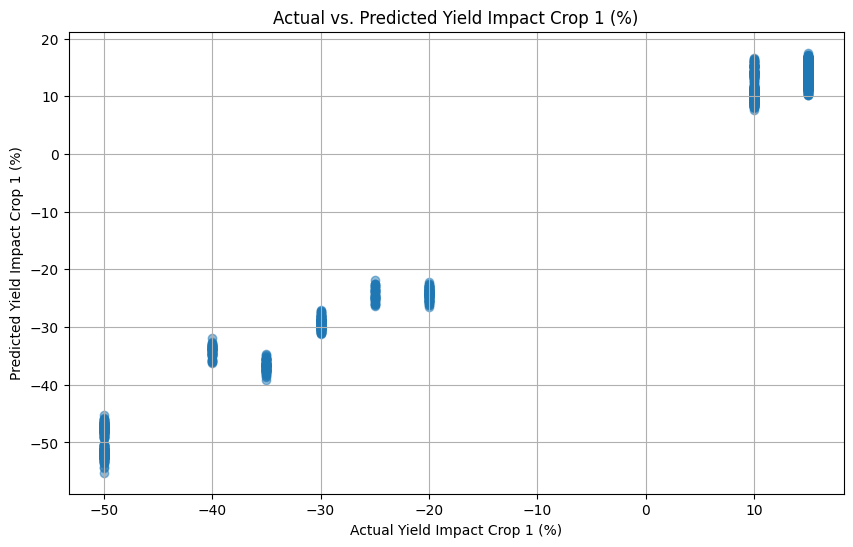

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Yield Impact Crop 1 (%)")
plt.ylabel("Predicted Yield Impact Crop 1 (%)")
plt.title("Actual vs. Predicted Yield Impact Crop 1 (%)")
plt.grid(True)
plt.show()

In [17]:
import joblib